# Big Data Fundamentals with PySpark - DataCamp
### Notes by César Muro Cabral



## Introduction to Big Data analysis with Spark  
  
What is Big Data?  
Big data is a term to the study and application of data sets that are too complex for traditional data-processing software.  
  
The # V's of Big Data  
* Volume, Variety, and Velocity  
* Volume: Size of the data
* Variety: Different sources and formats
* Velocity: Speed of the data.  
  
Big data concepts and terminology:  
* Clustered computing: Collection of resources of multiple machines
* Parallel computing: Simultaneous computation  
* Distributed computing: Collection of nodes (networked computers) that run in parallel. 
* Batch processing: Breaking the job into small pieces and running them on individual machines.
* Real-time processing: Inmediate processing of data.  
  
Big data processing systems:  
* Hadoop/MapReduce: Scalable and fault tolerant framework written in Java.  
   - Open source
   - Batch processing
* Apache Spark: General purpose and lightning fast cluster computing system.  
   - Open source
   - Both batch and real-time data processing
     
Features of Apache Spark Framework:  
* Distributed cluster computing framework.  
* Efficient in-memory computation for large data sets.  
* Lightnin fast data processing framework
* Provides support for java, Scala, Python, R, and SQL.  
  
Sparks modes of deployment:  
* Local mode: Single machine such as my laptop. it is convenient for testing, debugging and demonstration purposes.  
* Cluster mode: Set of pre-defined machines. Good for production
* Workflow: Local -> clusters. No code change is necessary.        
  

**PySpark: Spark with Python**  
Apache Spark provides high-level APIs in Scala, Java, Python, and R.  
* Apache Spark is written in Scala
* To support Python with Spark, Apache Spark Community released PySpark
* Similar computation speed and power as Scala
* PySpark are similar to pandas and scikit-learn
  
Spark shell:  
* Interactive environment for running Spark jobs
* Helpful for fast interactive prototyping
* Spark's shells allow interacting with data on disk or in memory
* Three different Spark shells: For Scala, Python, and R
    
PySpark shell:  
* PySpark shell is the Python-based command line tool
* PySpark shell allows data scientists interface with Spark data structures
* PySpark shell sipport connecting to cluster
  
Understanding SparkContext:
* SparkContext is an entry point into the world of Spark
* An entry point is a way of connecting to Spark cluster  
* An entry point is like a key to house
* PySpark has a default SparkContext called sc.  
  - sc.version
  - sc.pythonVer
  - sc.master  
  
 Loading data in PySpark
 * SparkContext's parallelize() method
 rdd=sc.parallelize([1,2,3,4,5])  
 * SparkContext's textfile() method
rdd2=sc.textFile("text.txt") 

Understanding SparkContext

A SparkContext represents the entry point to Spark functionality. It's like a key to your car. When we run any Spark application, a driver program starts, which has the main function and your SparkContext gets initiated here. PySpark automatically creates a SparkContext for you in the PySpark shell (so you don't have to create it by yourself) and is exposed via a variable sc.

In this simple exercise, you'll find out the attributes of the SparkContext in your PySpark shell which you'll be using for the rest of the course.

In [1]:
import os
import sys

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

In [2]:
import findspark
findspark.init()
findspark.find()

'C:\\spark-3.3.2-bin-hadoop2'

In [1]:
import pyspark

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [4]:
print('PySpark Version :'+spark.version)
print('Python version of Spark Context Version :'+spark.sparkContext.pythonVer)
print('The master of Spark Context in the PySpark shell is :'+spark.sparkContext.master)

PySpark Version :3.3.2
Python version of Spark Context Version :3.9
The master of Spark Context in the PySpark shell is :local[*]


In [5]:
# Create a Python list of numbers from 1 to 100 
numb = range(1,100)

# Load the list into PySpark  
spark_data = spark.sparkContext.parallelize(numb)

Loading data in PySpark shell

In PySpark, we express our computation through operations on distributed collections that are automatically parallelized across the cluster. In the previous exercise, you have seen an example of loading a list as parallelized collections and in this exercise, you'll load the data from a local file in PySpark shell.

Remember you already have a SparkContext sc and file_path variable (which is the path to the README.md file) already available in your workspace.

**Review of functional programming in Python**  
Anonymus function are functions that are not bound to a name at runtime, using construct called the lambda, and are well integrated into Python. Quite efficent with map() and filter().    
  
Syntax:    
lambda arguments: expresion    
  
* No return statement for lambda 
* Can put lambda function anywhere  
* Most of timer, we use lambdas with built-in function like map and filter  
* map() function takes a function and a list and returns a new list which contains items returned by that function for each item.  
* map(function,list)  
* E.g. items=[1,2,3,4], list(map(lambda x: x+2,items))  
* filter() function takes a function and a list and returns a new list for which the function evaluates as true. filter(function,list)  
* E.g. items=[1,2,3,4], list(filter(lambda x: (x%2 !=0),items))

Use of lambda() with map()

The map() function in Python returns a list of the results after applying the given function to each item of a given iterable (list, tuple etc.). The general syntax of map() function is map(fun, iter). We can also use lambda functions with map(). The general syntax of map() function with lambda() is map(lambda <argument>:<expression>, iter)

In [6]:
my_list=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  
# Print my_list in the console
print("Input list is", my_list)

# Square all numbers in my_list
squared_list_lambda = list(map(lambda x: x**2, my_list))

# Print the result of the map function
print("The squared numbers are", squared_list_lambda)

Input list is [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The squared numbers are [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


Use of lambda() with filter()

Another function that is used extensively in Python is the filter() function. The filter() function in Python takes in a function and a list as arguments. The general syntax of the filter() function is filter(function, list_of_input). Similar to the map(), filter() can be used with lambda function. The general syntax of the filter() function with lambda() is filter(lambda <argument>:<expression>, list)

In [5]:
my_list2=[10, 21, 31, 40, 51, 60, 72, 80, 93, 101]  
# Print my_list2 in the console
print("Input list is:", my_list2)

# Filter numbers divisible by 10
filtered_list = list(filter(lambda x: (x%10 == 0), my_list2))

# Print the numbers divisible by 10
print("Numbers divisible by 10 are:", filtered_list)

Input list is: [10, 21, 31, 40, 51, 60, 72, 80, 93, 101]
Numbers divisible by 10 are: [10, 40, 60, 80]


## Programming in PySpark RDD’s
RDD's which are Spark core abstraction for working with data.  
* Resilient distributed datasets. It is the fundamental and backbone datatype in PySpark.  
* When Spark starts processing data, it divides the data into partitions, and distributes the data across cluster nodes, with each node containing a slice of data. 
* Resilient: Ability to withstand failures.
* Distributed: Spanning across multiple machines. 
* Datasets: Collection of paritioned data, e.g. Arrays, Tables, etc.  
  
How to create RDDs?  
* Parallelizing an existing collection of objects.
* External datasets:  
  - Files in HDFS
  - Objects in Amazon S3 bucket
  - lines in a text file
* From existing RDDS  
  
Parallelized collection (parallelizing):  
* paralellize() for creating RDDs from python lists.  
  
Understanding Partitioning in PySpark:  
* A partition is a logical division of a large distributed data set.  
* minPartitions= argument in sc.parallelize().    
The number of partitions in an RDD can be found by using getNumPartitions().  

RDDs from Parallelized collections

Resilient Distributed Dataset (RDD) is the basic abstraction in Spark. It is an immutable distributed collection of objects. Since RDD is a fundamental and backbone data type in Spark, it is important that you understand how to create it. In this exercise, you'll create your first RDD in PySpark from a collection of words.

Remember you already have a SparkContext sc available in your workspace.

In [6]:
# Create an RDD from a list of words
RDD = spark.sparkContext.parallelize(["Spark", "is", "a", "framework", "for", "Big Data processing"])

# Print out the type of the created object
print("The type of RDD is", type(RDD))

The type of RDD is <class 'pyspark.rdd.RDD'>


RDDs from External Datasets

PySpark can easily create RDDs from files that are stored in external storage devices such as HDFS (Hadoop Distributed File System), Amazon S3 buckets, etc. However, the most common method of creating RDD's is from files stored in your local file system. This method takes a file path and reads it as a collection of lines. In this exercise, you'll create an RDD from the file path (file_path) with the file name README.md which is already available in your workspace.

% Print the file_path  
print("The file_path is", file_path)

% Create a fileRDD from file_path  
fileRDD = sc.textFile(file_path)

% Check the type of fileRDD  
print("The file type of fileRDD is", type(fileRDD))

Partitions in your data

SparkContext's textFile() method takes an optional second argument called minPartitions for specifying the minimum number of partitions. In this exercise, you'll create an RDD named fileRDD_part with 5 partitions and then compare that with fileRDD that you created in the previous exercise. Refer to the "Understanding Partition" slide in video 2.1 to know the methods for creating and getting the number of partitions in an RDD.

Remember, you already have a SparkContext sc, file_path and fileRDD available in your workspace.

% Check the number of partitions in fileRDD  
print("Number of partitions in fileRDD is", fileRDD.getNumPartitions())

% Create a fileRDD_part from file_path with 5 partitions  
fileRDD_part = sc.textFile(file_path, minPartitions = 5)

% Check the number of partitions in fileRDD_part  
print("Number of partitions in fileRDD_part is", fileRDD_part.getNumPartitions())

**Basic RDD Transformations and Actions**  
Spark operations: Trnasformations+actions.  
* Transformations create new RDDs
* Actions perform computation on the RDDs
  
RDD Transformations:  
* Transformations follow Lazy evaluation: Spark creates a graph from all the operations you perform on an RDD and execution of the graph starts only when an action is performed on RDD.
* Basic RDD transformations: map(), filter(), flatMap(), and union().  
* The map() transformation takes in a function and applies it to each element in the RDD.  
RDD = sc.parallelize([1,2,3,4])    
RDD_map=RDD.map(lambda x: x*x )  
* filter() transformation returns a new RDD woth only the elements that pass the condition  
RDD_filter=RDD.filter(lambda x: x>2)  
* flatMap() transformation returns multiple values for each element in the original RDD.  
RDD=sc.parallelize(["hello world","how are you"])  
RDD_flatmap=RDD.flatMap(lambda x: x.split(" "))    
* union() transformation for RDDs.  
RDD1.union(RDD2)  
  
RDD Actions:  
* Operation returns a value after running a computation on the RDD. 
* Basic RDD Actions: collect(), take(), first(), count().
* collect() return all the elements of the dataset as an array
* take(N) returns an array with the first N elements of the dataset.  

Map and Collect

The main method by which you can manipulate data in PySpark is using map(). The map() transformation takes in a function and applies it to each element in the RDD. It can be used to do any number of things, from fetching the website associated with each URL in our collection to just squaring the numbers. In this simple exercise, you'll use map() transformation to cube each number of the numbRDD RDD that you created earlier. Next, you'll return all the elements to a variable and finally print the output.

In [7]:
spark.conf.set("spark.databricks.io.parquet.fastreader.enabled","false")
spark.conf.set("spark.databricks.io.parquet.nativeReader.enabled","false")
spark.conf.set("spark.sql.parquet.enableVectorizedReader","false")

In [8]:
# Create an RDD with numbers 1 to 10
numbRDD = spark.sparkContext.parallelize([1,2,3])
# Create map() transformation to cube numbers
cubedRDD = numbRDD.map(lambda x: x**3)
# Collect the results
cubedRDD.collect()


[1, 8, 27]

Filter and Count

The RDD transformation filter() returns a new RDD containing only the elements that satisfy a particular function. It is useful for filtering large datasets based on a keyword. For this exercise, you'll filter out lines containing keyword Spark from fileRDD RDD which consists of lines of text from the README.md file. Next, you'll count the total number of lines containing the keyword Spark and finally print the first 4 lines of the filtered RDD.

Remember, you already have a SparkContext sc, file_path and fileRDD available in your workspace.

In [ ]:
# Filter the fileRDD to select lines with Spark keyword
fileRDD_filter = fileRDD.filter(lambda line: 'Spark' in line)

# How many lines are there in fileRDD?
print("The total number of lines with the keyword Spark is", fileRDD_filter.count())

# Print the first four lines of fileRDD
for line in fileRDD_filter.take(4): 
  print(line)

**Working with pair RDDs in PySpark**
* Most of real life datasets are usually key/value pairs  
* Each row is a key and maps to one or more values
* Pair RDD is a special data structure to work with this kind of datasets
* Pair RDD: key is the identifier and value is data
* Two common ways to create pair RDDs: From a list of key-value tuple, From a regular RDD.
* Get the data into key/value form for paired RDD
* All regular transformation work on pair RDD
* Have to pass function that operate on key value pairs rather than on individual elements
* Examples of paired RDD transformations: reduceByKey(func):Combine values with the same key. groupByKey(): group values with the same key. join(): Join two pair RDDs based on their key.  
  
**reduceByKey() transformation**
* reducByKey() tcombines values with the same key
* It runs parallel operation for each key in the datatset
* It is a transformation and not an action.
  
**sortByKey() transformation**  
* It orders pair RDD by key  
* It returns an RDD sorted by key in ascending or descending order  
  
**groupByKey() transformation**
* It group all the values with the same key in the pair RDD  
  
**join() transformation**
* join() transformation joins two pair RDDs based on their key  



ReduceBykey and Collect

One of the most popular pair RDD transformations is reduceByKey() which operates on key, value (k,v) pairs and merges the values for each key. In this exercise, you'll first create a pair RDD from a list of tuples, then combine the values with the same key and finally print out the result.

Remember, you already have a SparkContext sc available in your workspace.

In [9]:
# Create PairRDD Rdd with key value pairs
Rdd = spark.sparkContext.parallelize([(1,2),(3,4),(3,6),(4,5)])

# Apply reduceByKey() operation on Rdd
Rdd_Reduced = Rdd.reduceByKey(lambda x, y: x+y)

# Iterate over the result and print the output
for num in Rdd_Reduced.collect(): 
  print("Key {} has {} Counts".format(num[0], num[1]))

Key 1 has 2 Counts
Key 3 has 10 Counts
Key 4 has 5 Counts


SortByKey and Collect

Many times it is useful to sort the pair RDD based on the key (for example word count which you'll see later in the chapter). In this exercise, you'll sort the pair RDD Rdd_Reduced that you created in the previous exercise into descending order and print the final output.

Remember, you already have a SparkContext sc and Rdd_Reduced available in your workspace.

In [11]:
# Sort the reduced RDD with the key by descending order
Rdd_Reduced_Sort = Rdd_Reduced.sortByKey(ascending=False)

# Iterate over the result and retrieve all the elements of the RDD
for num in Rdd_Reduced_Sort.collect():
  print("Key {} has {} Counts".format(num[0], num[1]))

Key 4 has 5 Counts
Key 3 has 10 Counts
Key 1 has 2 Counts


**Advanced RDD Actions**  
* reduce(func) action is used for aggreagating the elements of a refular RDD
* the function should be commutative (changing the order of the operands does not change the result) and associative
* saveAsTextFile() saves RDD into a text file inside a directory with eahc partition as a separate file
* coalesce() can be used to save RDD as a single text file
* Few examples of pair RDD actions include: countByKey(), collectAsMap(). The second one, return the key-valu pairs in the RDD as a dictionary.  


In [13]:
# Count the unique keys
total = Rdd.countByKey()

# What is the type of total?
print("The type of total is", type(total))

# Iterate over the total and print the output
for k, v in total.items(): 
  print("key", k, "has", v, "counts")

The type of total is <class 'collections.defaultdict'>
key 1 has 1 counts
key 3 has 2 counts
key 4 has 1 counts


Create a base RDD and transform it

The volume of unstructured data (log lines, images, binary files) in existence is growing dramatically, and PySpark is an excellent framework for analyzing this type of data through RDDs. In this 3 part exercise, you will write code that calculates the most common words from Complete Works of William Shakespeare.

Here are the brief steps for writing the word counting program:

    Create a base RDD from Complete_Shakespeare.txt file.
    Use RDD transformation to create a long list of words from each element of the base RDD.
    Remove stop words from your data.
    Create pair RDD where each element is a pair tuple of ('w', 1)
    Group the elements of the pair RDD by key (word) and add up their values.
    Swap the keys (word) and values (counts) so that keys is count and value is the word.
    Finally, sort the RDD by descending order and print the 10 most frequent words and their frequencies.

In this first exercise, you'll create a base RDD from Complete_Shakespeare.txt file and transform it to create a long list of words.

Remember, you already have a SparkContext sc already available in your workspace. A file_path variable (which is the path to the Complete_Shakespeare.txt file) is also loaded for you.

In [15]:
file_path='big_data_fundamentals_pyspark_datasets/Complete_Shakespeare.txt'
# Create a baseRDD from the file path
baseRDD = spark.sparkContext.textFile(file_path)

# Split the lines of baseRDD into words
splitRDD = baseRDD.flatMap(lambda x: x.split())

# Count the total number of words
print("Total number of words in splitRDD:", splitRDD.count())

Total number of words in splitRDD: 128576


Remove stop words and reduce the dataset

After splitting the lines in the file into a long list of words in the previous exercise, in the next step, you'll remove stop words from your data. Stop words are common words that are often uninteresting. For example "I", "the", "a" etc., are stop words. You can remove many obvious stop words with a list of your own. But for this exercise, you will just remove the stop words from a curated list stop_words provided to you in your environment.

After removing stop words, you'll next create a pair RDD where each element is a pair tuple (k, v) where k is the key and v is the value. In this example, pair RDD is composed of (w, 1) where w is for each word in the RDD and 1 is a number. Finally, you'll combine the values with the same key from the pair RDD.

In [16]:
stop_words=['i','me','my','myself','we','our','ours','ourselves','you','your','yours','yourself','yourselves','he','him','his','himself','she','her','hers',
 'herself','it','its','itself','they','them','their','theirs','themselves','what','which','who','whom','this','that','these','those','am','is','are','was',
 'were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if','or','because','as','until','while','of',
 'at','by', 'for','with','about','against','between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again',
 'further','then','once','here','there','when','where','why','how','all','any','both','each','few','more','most','other','some','such','no','nor','not','only','own','same',
 'so','than','too','very','can','will','just','don','should','now']

# Convert the words in lower case and remove stop words from the stop_words curated list
splitRDD_no_stop = splitRDD.filter(lambda x: x.lower() not in stop_words)

# Create a tuple of the word and 1 
splitRDD_no_stop_words = splitRDD_no_stop.map(lambda w: (w, 1))

# Count of the number of occurences of each word
resultRDD = splitRDD_no_stop_words.reduceByKey(lambda x, y: x + y)

In [17]:
# Display the first 10 words and their frequencies from the input RDD
for word in resultRDD.take(10):
	print(word)

# Swap the keys and values from the input RDD
resultRDD_swap = resultRDD.map(lambda x: (x[1], x[0]))

# Sort the keys in descending order
resultRDD_swap_sort = resultRDD_swap.sortByKey(ascending=False)

# Show the top 10 most frequent words and their frequencies from the sorted RDD
for word in resultRDD_swap_sort.take(10):
	print("{},{}". format(word[1], word[0]))

('Project', 9)
('EBook', 1)
('Shakespeare', 12)
('use', 38)
('anyone', 1)
('anywhere', 1)
('restrictions', 1)
('whatsoever.', 1)
('may', 162)
('it,', 74)
thou,650
thy,574
shall,393
would,311
good,295
thee,286
love,273
Enter,269
th',254
make,225


### PySpark SQL & DataFrames
* PySpark SQL is a Spark library for structured data. it provides more information about the structure of data and computation.
* PySpark Dataframe is an immutable distributed collection of data with named columns*
* Designed for processing both structured and semi-structured data
* Dataframe API is available in Python, R, Scala, and Java
* DataFrames in PySpark support both SQL queries or expression methods.  
  
**SparkSession - Entry point for DataFrame API**
* SparkContext is the main entry for creating RDDs
* SparkSession provides a single point to entry interact with DataFrames
* SparkSession is used to create DataFrame, register DataFrames, execute SQL queries
* SparkSession is available in PySpark shell as spark
  
**Creating DataFrames in PySpark**
* Two different methods of creatingDataFrames in PySpark
  - From existing RDDs using SparkSession's createDataFRame() method
  - From various data sources (CSV, JSON, TXT) using SparkSession's read method.   
* Schema controls the data and helps DataFrames to optimize queries
* Schema provides information about column name, type of data in the column, empty values, etc. 

Creating from a RDD:      
df=spark.createDataFrame(RDD,schema=name_columns)  
    
Creating from reading a CSV, JSON, TXT    
df_csv=spark.read.csv("csv.csv",header=True, inferSchema=True)    
df_json=spark.read.json("people.json",header=True, inferSchema=True)  
df_txt=spark.read.txt("people.txt",header=True,inferSchema=True)  



RDD to DataFrame

Similar to RDDs, DataFrames are immutable and distributed data structures in Spark. Even though RDDs are a fundamental data structure in Spark, working with data in DataFrame is easier than RDD, and so understanding of how to convert RDD to DataFrame is necessary.

In this exercise, you'll first make an RDD using the sample_list that is already provided to you. This RDD contains the list of tuples ('Mona',20), ('Jennifer',34),('John',20), ('Jim',26) with each tuple contains the name of the person and their age. Next, you'll create a DataFrame using the RDD and the schema (which is the list of 'Name' and 'Age') and finally confirm the output as PySpark DataFrame.

Remember, you already have a SparkContext sc and SparkSession spark available in your workspace.

In [19]:
sample_list=[('Mona', 20), ('Jennifer', 34), ('John', 20), ('Jim', 26)]
# Create an RDD from the list
rdd = spark.sparkContext.parallelize(sample_list)

# Create a PySpark DataFrame
names_df = spark.createDataFrame(rdd, schema=['Name', 'Age'])

# Check the type of names_df
print("The type of names_df is", type(names_df))

The type of names_df is <class 'pyspark.sql.dataframe.DataFrame'>


Loading CSV into DataFrame

In the previous exercise, you have seen a method for creating a DataFrame from an RDD. Generally, loading data from CSV file is the most common method of creating DataFrames. In this exercise, you'll create a PySpark DataFrame from a people.csv file that is already provided to you as a file_path and confirm the created object is a PySpark DataFrame. 

In [20]:
file_path='big_data_fundamentals_pyspark_datasets/people.csv'
# Create an DataFrame from file_path
people_df = spark.read.csv(file_path, header=True, inferSchema=True)

# Check the type of people_df
print("The type of people_df is", type(people_df))

The type of people_df is <class 'pyspark.sql.dataframe.DataFrame'>


**Operating on DataFrame in PySpark**  
* DataFrame operation: Transformations and actions
* Dataframe transformations: select(),filter(), groupby(), orderby(),dropDuplicates(), and withColumnRenamed()
* DataFrame actions: printSchema(), head(), show(), count(), columns and describe().  
    
* select() transformation subsets the columns in the DataFrame
* show() action prints first 20 rows in DataFrame
* filter() transformation filters out the rows based on a condition
* groupby() operation can be used to gorup variable and add aggregations
* orderby() operation sorts the DataFrane based on one or more columns
* dropDuplicates() removes the duplicates rows of a DataFrame  
* withColumnRenamed() renames a column in the Dataframe
* printSchema() action operation prints the types of columns in the DataFrane
* columns operator prints the columns of a DataFrame
* describe() operayion compute summary statistics of numerical columns in the DataFrame.

Inspecting data in PySpark DataFrame

Inspecting data is very crucial before performing analysis such as plotting, modeling, training etc., In this simple exercise, you'll inspect the data in the people_df DataFrame that you have created in the previous exercise using basic DataFrame operators. 

In [21]:
# Print the first 10 observations 
people_df.show(10)

# Count the number of rows 
print("There are {} rows in the people_df DataFrame.".format(people_df.count()))

# Count the number of columns and their names
print("There are {} columns in the people_df DataFrame and their names are {}".format(len(people_df.columns), people_df.columns))

+---+---------+----------------+------+-------------------+
|_c0|person_id|            name|   sex|      date of birth|
+---+---------+----------------+------+-------------------+
|  0|      100|  Penelope Lewis|female|1990-08-31 00:00:00|
|  1|      101|   David Anthony|  male|1971-10-14 00:00:00|
|  2|      102|       Ida Shipp|female|1962-05-24 00:00:00|
|  3|      103|    Joanna Moore|female|2017-03-10 00:00:00|
|  4|      104|  Lisandra Ortiz|female|2020-08-05 00:00:00|
|  5|      105|   David Simmons|  male|1999-12-30 00:00:00|
|  6|      106|   Edward Hudson|  male|1983-05-09 00:00:00|
|  7|      107|    Albert Jones|  male|1990-09-13 00:00:00|
|  8|      108|Leonard Cavender|  male|1958-08-08 00:00:00|
|  9|      109|  Everett Vadala|  male|2005-05-24 00:00:00|
+---+---------+----------------+------+-------------------+
only showing top 10 rows

There are 100000 rows in the people_df DataFrame.
There are 5 columns in the people_df DataFrame and their names are ['_c0', 'person_i

PySpark DataFrame subsetting and cleaning

After data inspection, it is often necessary to clean the data which mainly involves subsetting, renaming the columns, removing duplicated rows etc., PySpark DataFrame API provides several operators to do this. In this exercise, your job is to subset 'name', 'sex' and 'date of birth' columns from people_df DataFrame, remove any duplicate rows from that dataset and count the number of rows before and after duplicates removal step.

In [22]:
# Select name, sex and date of birth columns
people_df_sub = people_df.select('name', 'sex', 'date of birth')

# Print the first 10 observations from people_df_sub
people_df_sub.show(10)

# Remove duplicate entries from people_df_sub
people_df_sub_nodup = people_df_sub.dropDuplicates()

# Count the number of rows
print("There were {} rows before removing duplicates, and {} rows after removing duplicates".format(people_df_sub.count(), people_df_sub_nodup.count()))

+----------------+------+-------------------+
|            name|   sex|      date of birth|
+----------------+------+-------------------+
|  Penelope Lewis|female|1990-08-31 00:00:00|
|   David Anthony|  male|1971-10-14 00:00:00|
|       Ida Shipp|female|1962-05-24 00:00:00|
|    Joanna Moore|female|2017-03-10 00:00:00|
|  Lisandra Ortiz|female|2020-08-05 00:00:00|
|   David Simmons|  male|1999-12-30 00:00:00|
|   Edward Hudson|  male|1983-05-09 00:00:00|
|    Albert Jones|  male|1990-09-13 00:00:00|
|Leonard Cavender|  male|1958-08-08 00:00:00|
|  Everett Vadala|  male|2005-05-24 00:00:00|
+----------------+------+-------------------+
only showing top 10 rows

There were 100000 rows before removing duplicates, and 99998 rows after removing duplicates


Filtering your DataFrame

In the previous exercise, you have subset the data using select() operator which is mainly used to subset the DataFrame column-wise. What if you want to subset the DataFrame based on a condition (for example, select all rows where the sex is Female). In this exercise, you will filter the rows in the people_df DataFrame in which 'sex' is female and male and create two different datasets. Finally, you'll count the number of rows in each of those datasets.

In [23]:
# Filter people_df to select females 
people_df_female = people_df.filter(people_df.sex == "female")

# Filter people_df to select males
people_df_male = people_df.filter(people_df.sex == "male")

# Count the number of rows 
print("There are {} rows in the people_df_female DataFrame and {} rows in the people_df_male DataFrame".format(people_df_female.count(), people_df_male.count()))

There are 49014 rows in the people_df_female DataFrame and 49066 rows in the people_df_male DataFrame


**Interacting with DataFrames using PySparkSQL**  
* In PySpark yu can interact with SparkSQL through DataFrame API and SQL queries
* The DataFrame API provides a programmatic domain-specific language (DSL) for data
* DataFrame transformation and actions are easier to construct programmatically
* SQL queries can be consice and easier to understand and portable
* The operations on DataFrame can also be done using SQL queries
  
**Executing SQL Queries**  
* The SparkSession sql() method executes SQL quey
* sql() method takes a SQL statement as an argument and returns the result as DataFrame
* We need to create a temp table through createOrReplaceTempView function to build a temporary table as shown.   
df.createOrReplaceTempView('table1)  
df2=spark.sql("SELECT field1, field2 FROM TABLE 1")  
df2.collect()  
  
**SQL query to extract data**  
test_df.createOrReplaceTempView("test_table")      
query='''SELECT Product_ID FROM test_table'''      
test_product_df=spark.sql(query)      
test_product_df.show(5)   
   

Running SQL Queries Programmatically

DataFrames can easily be manipulated using SQL queries in PySpark. The sql() function on a SparkSession enables applications to run SQL queries programmatically and returns the result as another DataFrame. In this exercise, you'll create a temporary table of the people_df DataFrame that you created previously, then construct a query to select the names of the people from the temporary table and assign the result to a new DataFrame.

In [24]:
# Create a temporary table "people"
people_df.createOrReplaceTempView("people")

# Construct a query to select the names of the people from the temporary table "people"
query = '''SELECT name FROM people'''

# Assign the result of Spark's query to people_df_names
people_df_names = spark.sql(query)

# Print the top 10 names of the people
people_df_names.show(10)

+----------------+
|            name|
+----------------+
|  Penelope Lewis|
|   David Anthony|
|       Ida Shipp|
|    Joanna Moore|
|  Lisandra Ortiz|
|   David Simmons|
|   Edward Hudson|
|    Albert Jones|
|Leonard Cavender|
|  Everett Vadala|
+----------------+
only showing top 10 rows



SQL queries for filtering Table

In the previous exercise, you have run a simple SQL query on a DataFrame. There are more sophisticated queries you can construct to obtain the result that you want and use it for downstream analysis such as data visualization and Machine Learning. In this exercise, we will use the temporary table people that you created previously and filter out the rows where the "sex" is male and female and create two DataFrames.

In [25]:
# Filter the people table to select female sex 
people_female_df = spark.sql('SELECT * FROM people WHERE sex=="female"')

# Filter the people table DataFrame to select male sex
people_male_df = spark.sql('SELECT * FROM people WHERE sex=="male"')

# Count the number of rows in both DataFrames
print("There are {} rows in the people_female_df and {} rows in the people_male_df DataFrames".format(people_female_df.count(), people_male_df.count()))

There are 49014 rows in the people_female_df and 49066 rows in the people_male_df DataFrames


**Data Visualization in PySpark using DataFrames**  
* Plotting graphs using PySpark DataFrames is done using three methods: pyspark_dist_explore, toPandas(), HandySpark.  
* Pyspark_dist_explore library provides quick insights into DataFrames
* Currently three function avalaible - hist(), distplot() and pandas_histogram()  
An example:  
test_df=spark.read.csv("test.csv",header=True,inferSchema=True)  
test_df_age=test_df.select('Age')  
hist(test_df_age,bins=20,color='red')     
    
* Using pandas for plotting DataFrames.  
test_df= spark.read("test.csv",header=True,inferSchema=True)  
test_df_sample_pandas=test_df.toPandas()   
test_df_sample_pandas.hist('Age')   
  
**Pandas DataFrame vs PySpark DataFrame**      
* Pandas DataFrames are in-memory, single-server based structures and operations on PySpark run in parallel 
* The result is generated as we apply any operation in Pandas  whereas operations in PySpark Dataframe are lazy evaluation
* Pandas DataFrame as mutable and PySpark DataFrames are immutable
* Pandas API support more operations than PySpark DataFrame API  
  
**HandySpark method of visualization**  
* HandySpark is a package desgined to improve PySpark user experience   
hdf=test_df.toHandy()    
hdf.cols['Age'].hist()    
  

PySpark DataFrame visualization

Graphical representations or visualization of data is imperative for understanding as well as interpreting the data. In this simple data visualization exercise, you'll first print the column names of names_df DataFrame that you created earlier, then convert the names_df to Pandas DataFrame and finally plot the contents as horizontal bar plot with names of the people on the x-axis and their age on the y-axis. 

The column names of names_df are ['Name', 'Age']


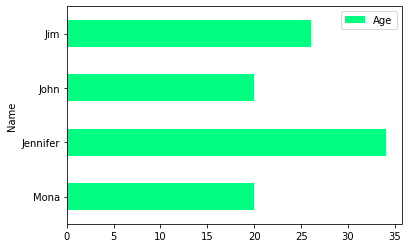

In [26]:
import pandas as pd
import matplotlib.pyplot as plt  
# Check the column names of names_df
print("The column names of names_df are", names_df.columns)

# Convert to Pandas DataFrame  
df_pandas = names_df.toPandas()

# Create a horizontal bar plot
df_pandas.plot(kind='barh', x='Name', y='Age', colormap='winter_r')
plt.show()

Part 1: Create a DataFrame from CSV file

Every 4 years, the soccer fans throughout the world celebrates a festival called “Fifa World Cup” and with that, everything seems to change in many countries. In this 3 part exercise, you'll be doing some exploratory data analysis (EDA) on the "FIFA 2018 World Cup Player" dataset using PySpark SQL which involve DataFrame operations, SQL queries and visualization.

In the first part, you'll load FIFA 2018 World Cup Players dataset (Fifa2018_dataset.csv) which is in CSV format into a PySpark's dataFrame and inspect the data using basic DataFrame operations. 

In [27]:
file_path='big_data_fundamentals_pyspark_datasets/Fifa2018_dataset.csv'
# Load the Dataframe
fifa_df = spark.read.csv(file_path, header=True, inferSchema=True)

# Check the schema of columns
fifa_df.printSchema()

# Show the first 10 observations
fifa_df.show(10)

# Print the total number of rows
print("There are {} rows in the fifa_df DataFrame".format(fifa_df.count()))

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Aggression: string (nullable = true)
 |-- Agility: string (nullable = true)
 |-- Balance: string (nullable = true)
 |-- Ball control: string (nullable = true)
 |-- Composure: string (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Curve: string (nullable = true)
 |-- Dribbling: string (nullable = true)
 |-- Finishing: string (nullable = true)
 |-- Free kick accuracy: string (nullable = true)
 |-- GK diving: string (nullable = true)


In [28]:
# Create a temporary view of fifa_df
fifa_df.createOrReplaceTempView('fifa_df_table')

# Construct the "query"
query = '''SELECT Age FROM fifa_df_table WHERE Nationality == "Germany"'''

# Apply the SQL "query"
fifa_df_germany_age = spark.sql(query)

# Generate basic statistics
fifa_df_germany_age.describe().show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|             1140|
|   mean|24.20263157894737|
| stddev|4.197096712293752|
|    min|               16|
|    max|               36|
+-------+-----------------+



Part 3: Data visualization

Data visualization is important for exploratory data analysis (EDA). PySpark DataFrame is a perfect for data visualization compared to RDDs because of its inherent structure and schema.

In this third part, you'll create a histogram of the ages of all the players from Germany from the DataFrame that you created in the previous exercise. For this, you'll first convert the PySpark DataFrame into Pandas DataFrame and use matplotlib's plot() function to create a density plot of ages of all players from Germany.

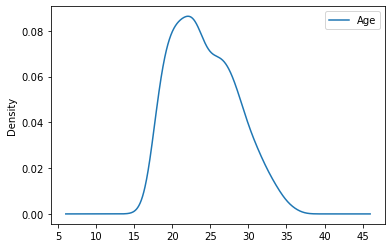

In [29]:
# Convert fifa_df to fifa_df_germany_age_pandas DataFrame
fifa_df_germany_age_pandas = fifa_df_germany_age.toPandas()

# Plot the 'Age' density of Germany Players
fifa_df_germany_age_pandas.plot(kind='density')
plt.show()

## Overview of PySpark MLlib  
Machine learning is a scientific discipline that explores the construction and study of algorithms that can learn from data.  
* MLlib is a component of ApacheSpark for machine learning
* Varios tool provided by MLlib include:  
   - ML Algorithms: collaborative filtering, classification, and clustering
   - Featurization: feature extraction, transformation, dimensionality reduction, and selection
   - Pipelines: tools for constructing, evaluating, and tuning ML Pipelines
* Scikit-learn algorithms only work for small datasets on a single machine
* Spark's MLlib algorithms are designed for parallel processing on a cluster
* pyspark.mllib is the builtin library for RDD-based API  
* Supports languages such as Scala, R, and Java 
* Provides a high-level API to buil machine learning pipelines  
  

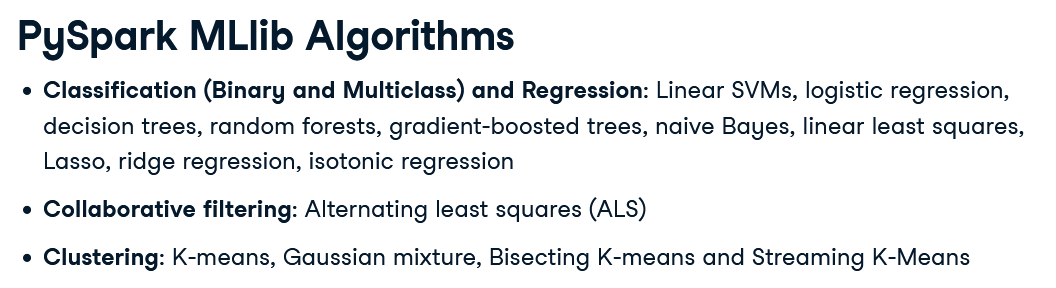

**The three C's of machine learning in PySpark MLlib**  
Collaborative filtering, classification, and clustering.  
* Collaborative filtering (recommender engines): Produce recommendations  
* Classification: Identifying to which of a set of categories a new observation
* Clustering: Groups data based on similar characteristics
  
  
from pyspark.mllib.recommendation import ALS  
from pyspark.mllib.classification import LogisticRegressioWithLBFGS  
from pyspark.mllib.clustering import KMeans

PySpark MLlib algorithms

Before using any Machine learning algorithms in PySpark shell, you'll have to import the submodules of pyspark.mllib library and then choose the appropriate class that is needed for a specific machine learning task. 

In [10]:
# Import the library for ALS
from pyspark.sql.functions import broadcast
from pyspark.mllib.recommendation import ALS, MatrixFactorizationModel, Rating

# Import the library for Logistic Regression
from pyspark.mllib.classification import LogisticRegressionWithLBFGS

# Import the library for Kmeans
from pyspark.mllib.clustering import KMeans

### Collaborative filtering  
* It is a method of making automatic predictions about the interests of a user by collecting preferences or taste information from many users  
* It is one of the most common used algorithms in recommender systems
* It has two approaches: 
  - User-user collaborative filterin: finds users that are similar to the target user  
  - Item-item collaborative filterin: fins recommend items that are similar to items with the target user    
    
* The rating class is a wrapper around tuple (user, product, and rating)  
* Useful for parsing the RDD and creating a tuple of user, product, and rating
  
from pyspark.mllib.recommendation import Rating    
r = Rating(user=1, product=2,rating=5.0)    
(r[0],r[1],r[2])    
  
* Splitting data into training and testing sets is important for evaluating predictive modeling
* Typically a large portion of data is assigned to training compared to testing data
* PySpark's randomSplit() method randomly splits with the provided weights and returns multiple RDDs 
* The Alternating Leat Squares (ALS) algorithm avaliable in spark.mllib helps to find products that the customers might like, based on their previous purchases or ratings  
* ALS.train(ratings, rank, iterations)  
* Predicting the ratings for the user and product pairs  
* predictAll() method returns a list of predicted ratings for input user and product pair 
* the method takes in an RDD withput ratings to generate the ratings  
* For evaluating the model, we can use Mean Squared Error (MSE), which is the average value of the square of actual rating - predicted rating.  

Loading Movie Lens dataset into RDDs

Collaborative filtering is a technique for recommender systems wherein users' ratings and interactions with various products are used to recommend new ones. With the advent of Machine Learning and parallelized processing of data, Recommender systems have become widely popular in recent years, and are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags. In this 3-part exercise, your goal is to develop a simple movie recommendation system using PySpark MLlib using a subset of MovieLens 100k dataset.

In the first part, you'll first load the MovieLens data (ratings.csv) into RDD and from each line in the RDD which is formatted as userId,movieId,rating,timestamp, you'll need to map the MovieLens data to a Ratings object (userID, productID, rating) after removing timestamp column and finally you'll split the RDD into training and test RDDs.

In [11]:
file_path='big_data_fundamentals_pyspark_datasets/ratings.csv'
# Load the data into RDD
data = spark.sparkContext.textFile(file_path)

# Split the RDD 
ratings = data.map(lambda l: l.split(','))

# Transform the ratings RDD 
ratings_final = ratings.map(lambda line: Rating(int(line[0]), int(line[1]), float(line[2])))

# Split the data into training and test
training_data, test_data = ratings_final.randomSplit([0.8, 0.2])

In [14]:
data.take(8)

['1,31,2.5,1260759144',
 '1,1029,3.0,1260759179',
 '1,1061,3.0,1260759182',
 '1,1129,2.0,1260759185',
 '1,1172,4.0,1260759205',
 '1,1263,2.0,1260759151',
 '1,1287,2.0,1260759187',
 '1,1293,2.0,1260759148']

Model training and predictions

After splitting the data into training and test data, in the second part of the exercise, you'll train the ALS algorithm using the training data. PySpark MLlib's ALS algorithm has the following mandatory parameters - rank (the number of latent factors in the model) and iterations (number of iterations to run). After training the ALS model, you can use the model to predict the ratings from the test data. For this, you will provide the user and item columns from the test dataset and finally return the list of 2 rows of predictAll() output. 

In [12]:
# Create the ALS model on the training data
model = ALS.train(training_data, rank=10, iterations=10)

# Drop the ratings column 
testdata_no_rating = test_data.map(lambda p: (p[0], p[1]))

# Predict the model  
predictions = model.predictAll(testdata_no_rating)

# Return the first 2 rows of the RDD
predictions.take(2)

[Rating(user=547, product=45208, rating=0.14621504224735316),
 Rating(user=648, product=3456, rating=2.0747920036843426)]

Model evaluation using MSE

After generating the predicted ratings from the test data using ALS model, in this final part of the exercise, you'll prepare the data for calculating Mean Square Error (MSE) of the model. The MSE is the average value of (original rating – predicted rating)**2 for all users and indicates the absolute fit of the model to the data. To do this, first, you'll organize both the ratings and prediction RDDs to make a tuple of ((user, product), rating)), then join the ratings RDD with prediction RDD and finally apply a squared difference function along with mean() to get the MSE.

In [13]:
# Prepare ratings data
rates = ratings_final.map(lambda r: ((r[0], r[1]), r[2]))

# Prepare predictions data
preds = predictions.map(lambda r: ((r[0], r[1]), r[2]))

# Join the ratings data with predictions data
rates_and_preds = rates.join(preds)

# Calculate and print MSE
MSE = rates_and_preds.map(lambda r: (r[1][0] - r[1][1])**2).mean()
print("Mean Squared Error of the model for the test data = {:.2f}".format(MSE))

Mean Squared Error of the model for the test data = 1.36


### Classification 
* Classification is a popular machine learning algorithm that identifies which category an item belongs to.  
* Binary classification, and multi-class classification  
* PySpark supports various methods for binary classification such as linear SVMs, logistic regression, decision trees, random forests, gradient-boosted trees, naive Bayes
* In multiclass classification, we want to classify entities into more than two categories. PySpark supports various methods such as logistic regression, decision trees, random forests, naive Bayes.

* Logistic regression predicts a binary response based on somre variable. It fits the logistic function $sig(t)=\frac{1}{1+e^{-t}}$.    
** Working with vectors**  
* Pyspark MLlib contains specific data types Vectors and LabelledPoint
* Two types of Vectors:
    - Dense Vector: store all their entries in an array of floating point numbers
    - Sparse Vector: store only the nonzero values and their indices  
E.g.  
denseVec=Vectors.dense([1.0,2.0,3.0])  
denseVec=Vectors.sparse(4,{1:1.0,3:5.5}) 

**LabelledPoint() in PySpark MLlib**  
* A LabeledPoint is a wrapper for input features and predicted value  
* For binary classification of Logistic Regression, a label is either 0 (negative) or 1 (positive).   
positive=LabeledPoint(1.0,[1.0,0.0,3.0])
negative=LabeledPoint(0.0,[2.0,1.0,1.0])   
* HashingTF() algorithm is used to map feature value to indices in the feature vector  
from pyspark.mllib.feature impor hashingTF
   

**Logistic Regression using LogisticRegressionWithLBFGS**  
* In Pyspark MLlib is achieved using LogisticRegressionWithLBFGS class

Loading spam and non-spam data

Logistic Regression is a popular method to predict a categorical response. Probably one of the most common applications of the logistic regression is the message or email spam classification. In this 3-part exercise, you'll create an email spam classifier with logistic regression using Spark MLlib. Here are the brief steps for creating a spam classifier.

*    Create an RDD of strings representing email.
*    Run MLlib’s feature extraction algorithms to convert text into an RDD of vectors.
*    Call a classification algorithm on the RDD of vectors to return a model object to classify new points.
*    Evaluate the model on a test dataset using one of MLlib’s evaluation functions.

In the first part of the exercise, you'll load the 'spam' and 'ham' (non-spam) files into RDDs, split the emails into individual words and look at the first element in each of the RDD.

In [29]:
file_path_spam='big_data_fundamentals_pyspark_datasets/spam.txt'
file_path_non_spam='big_data_fundamentals_pyspark_datasets/ham.txt'
# Load the datasets into RDDs
spam_rdd = spark.sparkContext.textFile(file_path_spam)
non_spam_rdd = spark.sparkContext.textFile(file_path_non_spam)

# Split the email messages into words
spam_words = spam_rdd.flatMap(lambda email: email.split(' '))
non_spam_words = non_spam_rdd.flatMap(lambda email: email.split(' '))

# Print the first element in the split RDD
print("The first element in spam_words is", spam_words.first())
print("The first element in non_spam_words is", non_spam_words.first())

The first element in spam_words is You
The first element in non_spam_words is Rofl.


Feature hashing and LabelPoint

After splitting the emails into words, our raw data set of 'spam' and 'non-spam' is currently composed of 1-line messages consisting of spam and non-spam messages. In order to classify these messages, we need to convert text into features.

In the second part of the exercise, you'll first create a HashingTF() instance to map text to vectors of 200 features, then for each message in 'spam' and 'non-spam' files you'll split them into words, and each word is mapped to one feature. These are the features that will be used to decide whether a message is 'spam' or 'non-spam'. Next, you'll create labels for features. For a valid message, the label will be 0 (i.e. the message is not spam) and for a 'spam' message, the label will be 1 (i.e. the message is spam). Finally, you'll combine both the labeled datasets.

In [41]:
from pyspark.mllib.feature import HashingTF
from pyspark.mllib.regression import LabeledPoint
import pandas as pd
# Create a HashingTf instance with 200 features
tf = HashingTF(numFeatures=200)

# Map each word to one feature
spam_features = tf.transform(spam_words)
non_spam_features = tf.transform(non_spam_words)

# Label the features: 1 for spam, 0 for non-spam
spam_samples = spam_features.map(lambda features:LabeledPoint(1, features))
non_spam_samples = non_spam_features.map(lambda features:LabeledPoint(0, features))

# Combine the two datasets
samples = spam_samples.union(non_spam_samples)

Logistic Regression model training

After creating labels and features for the data, we’re ready to build a model that can learn from it (training). But before you train the model, in this final part of the exercise, you'll split the data into training and test, run Logistic Regression model on the training data, and finally check the accuracy of the model trained on training data.

In [42]:
from pyspark.mllib.classification import LogisticRegressionWithLBFGS, LogisticRegressionModel
from pyspark.mllib.regression import LabeledPoint
# Split the data into training and testing
train_samples,test_samples = samples.randomSplit([0.8, 0.2])

# Train the model
model = LogisticRegressionWithLBFGS.train(train_samples,numClasses=2)

# Create a prediction label from the test data
predictions = model.predict(test_samples.map(lambda x: x.features))

# Combine original labels with the predicted labels
labels_and_preds = test_samples.map(lambda x: x.label).zip(predictions)

# Check the accuracy of the model on the test data
accuracy = labels_and_preds.filter(lambda x: x[0] == x[1]).count() / float(test_samples.count())
print("Model accuracy : {:.2f}".format(accuracy))

Model accuracy : 0.82


### Clustering  
* Clustering is a kind of unsupervised learning method to group unlabeled data together into groups  
* It can be used to make sense of unlabeled data
* PySpark MLlib library currently supports clustering models such as: K-means, Gaussian mixture, Power iteration clustering (PIC), Bisectin k-means, Streaming k-means  
* K-means clustering takes data point in an input data and will identify which data points belong to each one of the clusters.   
* The first step in implementing K-means clustering algorithm using PySpark MLlib is loading the numerical data into an RDD, and then parsing the data based on a delimiter. 
* Training K-means model is done using KMeans.train() method    
from pyspark.mllib.clusterin import KMeans  
model=KMeans.train(RDD,k=2,maxIterations=10)  
model.clusterCenters  
* Evaluate the model by the error function. Unfortunately, PySpark K-means algorithm doesn't have a method already, so we have to write a function by ourselves.  

As we know, plotting libraries does not work directly on RDDs and DataFrames. Then, to visualize clusters:  
wine_data_df=spark.createDataFrame(RDD,schema=["col1","col2"])  
wine_data_df_pandas=wine_data_df.toPandas()  
clusters_centers_pandas=pd.DataFrame(model.clusterCenters,columns=["col1","col2"])  
plt.scatter(clusters_centers_pandas['col1'],clusters_centers_pandas['col2'],color="red",marker="x")  

Loading and parsing the 5000 points data

Clustering is the unsupervised learning task that involves grouping objects into clusters of high similarity. Unlike the supervised tasks, where data is labeled, clustering can be used to make sense of unlabeled data. PySpark MLlib includes the popular K-means algorithm for clustering. In this 3 part exercise, you'll find out how many clusters are there in a dataset containing 5000 rows and 2 columns. For this you'll first load the data into an RDD, parse the RDD based on the delimiter, run the KMeans model, evaluate the model and finally visualize the clusters.

In the first part, you'll load the data into RDD, parse the RDD based on the delimiter and convert the string type of the data to an integer.

In [43]:
file_path='big_data_fundamentals_pyspark_datasets/5000_points.txt'
# Load the dataset into an RDD
clusterRDD = spark.sparkContext.textFile(file_path)

# Split the RDD based on tab
rdd_split = clusterRDD.map(lambda x: x.split("\t"))

# Transform the split RDD by creating a list of integers
rdd_split_int = rdd_split.map(lambda x: [int(x[0]), int(x[1])])

# Count the number of rows in RDD 
print("There are {} rows in the rdd_split_int dataset".format(rdd_split_int.count()))

There are 5000 rows in the rdd_split_int dataset


In [44]:
from math import sqrt
def error(point):
    center=model.centers[model.predict(point)]
    return sqrt(sum([x**2 for x in (point-center)]))

from pyspark.mllib.clustering import KMeans
# Train the model with clusters from 13 to 16 and compute WSSSE
for clst in range(13, 17):
    model = KMeans.train(rdd_split_int, clst, seed=1)
    WSSSE = rdd_split_int.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    print("The cluster {} has Within Set Sum of Squared Error {}".format(clst, WSSSE))

# Train the model again with the best k
model = KMeans.train(rdd_split_int, k=15, seed=1)

# Get cluster centers
cluster_centers = model.clusterCenters

The cluster 13 has Within Set Sum of Squared Error 252060331.1260039
The cluster 14 has Within Set Sum of Squared Error 215808893.2796594
The cluster 15 has Within Set Sum of Squared Error 169394691.52639425
The cluster 16 has Within Set Sum of Squared Error 168103213.0429197


Visualizing clusters

You just trained the k-means model with an optimum k value (k=15) and generated cluster centers (centroids). In this final exercise, you will visualize the clusters and the centroids by overlaying them. This will indicate how well the clustering worked (ideally, the clusters should be distinct from each other and centroids should be at the center of their respective clusters).

To achieve this, you will first convert the rdd_split_int RDD into a Spark DataFrame, and then into Pandas DataFrame which can be used for plotting. Similarly, you will convert cluster_centers into a Pandas DataFrame. Once both the DataFrames are created, you will create scatter plots using Matplotlib.

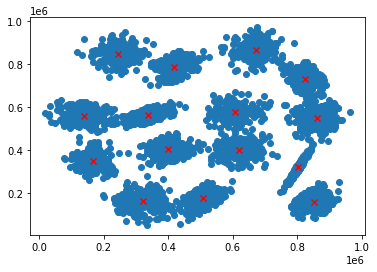

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
# Convert rdd_split_int RDD into Spark DataFrame and then to Pandas DataFrame
rdd_split_int_df_pandas = spark.createDataFrame(rdd_split_int, schema=["col1", "col2"]).toPandas()

# Convert cluster_centers to a pandas DataFrame
cluster_centers_pandas = pd.DataFrame(cluster_centers, columns=["col1", "col2"])

# Create an overlaid scatter plot of clusters and centroids
plt.scatter(rdd_split_int_df_pandas["col1"], rdd_split_int_df_pandas["col2"])
plt.scatter(cluster_centers_pandas["col1"], cluster_centers_pandas["col2"], color="red", marker="x")
plt.show()